In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binned_statistic
plt.rcParams['axes.grid'] = True

In [3]:
from scipy import stats

In [4]:
file = np.genfromtxt('sDRC_2606/matchedDRCref2606.dat',names=True)

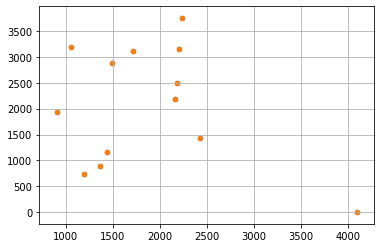

In [5]:
fig, ax = plt.subplots()

ax.scatter(file['xr_f606w'],file['yr_f606w'],s=20)
ax.scatter(file['xr_f814w'],file['yr_f814w'],s=20)



plt.show()

In [6]:
file = np.genfromtxt('sDRC_2606/matchedDRCfullCat_2606.dat',names=True)

In [7]:
# fileCat = np.genfromtxt('sDRC_2606/matchedDRCfullCat_2606.dat')
# idx = np.argsort(file['magr_f606w'])[:50]

# out_main = fileCat[idx]
# flags_f606w, RA_f606w, DEC_f606w, xr_f606w, yr_f606w, flux_f606w, c_star_f606w, magr_f606w, \
#     id_f606w, xr_f814w_trans, yr_f814w_trans, id606 = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

# np.savetxt('sDRC_2606/drc50.reg',out_main[:,[xr_f606w, yr_f606w]],fmt='%1.5f %1.5f')

In [8]:
mat_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
mat = np.genfromtxt(mat_dir + 'HOROLOGIUM_CF.2.TOSEND.CAT',names=True)

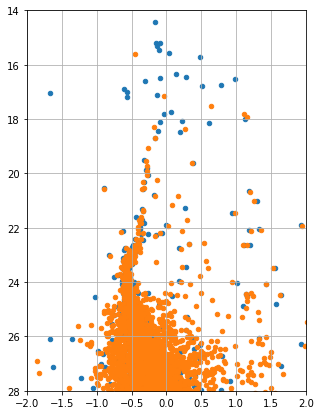

In [9]:
fig, ax = plt.subplots(figsize=(5,7))

ax.scatter(file['magr_f606w']-file['magr_f814w'],file['magr_f606w'],s=20,label='New DRC')
ax.scatter(mat['m606c']-mat['m814c'],mat['m606c'],s=20,label='Mattia APER')

ax.set_ylim(28,14)
ax.set_xlim(-2,2)

plt.show()

In [10]:
match = np.genfromtxt('sDRC_2606/matchedDRCaper2606.dat',names=True)

In [12]:
# match_g = np.delete(match['m606cAPER'],np.where(np.isnan(match['m606cAPER'])))

g_idx = np.logical_and(np.logical_and(match['m606cAPER']>12,match['m814cAPER']>12),\
                       np.logical_and(match['magr_f606w']<=26.5,match['magr_f814w']<26.5))
match_g = match[g_idx]

In [ ]:
match_g.dtype.names

In [ ]:
# med = np.mean(stats.sigmaclip(match_g[''],3.5,3.5)[0])

In [ ]:
mean1 = np.mean(stats.sigmaclip(han_v-mat_v,4,4)[0])
median1 = np.median(stats.sigmaclip(han_v-mat_v,4,4)[0])
median2 = np.median(stats.sigmaclip(han_i-mat_i,4,4)[0])
median3 = np.median(stats.sigmaclip(han_c-mat_c,4,4)[0])

In [ ]:
han_i = match_g['magr_f814w']
han_v = match_g['magr_f606w']
mat_i = match_g['m814cPSF']
mat_v = match_g['m606cPSF']

han_c = han_v - han_i
mat_c = mat_v - mat_i

In [ ]:
bin_means1, bin_edges1, binnum1= binned_statistic(mat_v, han_v-mat_v, \
                    bins=10, range=(19.5, 27),statistic='mean')

bin_width = (bin_edges1[1] - bin_edges1[0])
bin_cent1 = bin_edges1[1:] - bin_width/2

bin_means2, bin_edges2, binnum2= binned_statistic(mat_i, han_i-mat_i, \
                    bins=10, range=(19.5, 29),statistic='mean')

bin_width = (bin_edges2[1] - bin_edges2[0])
bin_cent2 = bin_edges2[1:] - bin_width/2

bin_means3, bin_edges3, binnum3= binned_statistic(mat_c, han_c-mat_c, \
                    bins=10, range=(-1,2.5),statistic='mean')

bin_width = (bin_edges3[1] - bin_edges3[0])
bin_cent3 = bin_edges3[1:] - bin_width/2

bin_means4, bin_edges4, binnum4= binned_statistic(mat_v, \
        han_v-mat_v, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges4[1] - bin_edges4[0])
bin_cent4 = bin_edges4[1:] - bin_width/2

bin_val4 = bin_means4/np.sqrt(len(mat_v))

bin_means5, bin_edges5, binnum5= binned_statistic(mat_i, \
        han_i-mat_i, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges5[1] - bin_edges5[0])
bin_cent5 = bin_edges5[1:] - bin_width/2

bin_val5 = bin_means5/np.sqrt(len(mat_i))

bin_means6, bin_edges6, binnum6= binned_statistic(mat_c, \
        han_c-mat_c, \
                    bins=10, range=(-1,2.5),statistic='std')

bin_width = (bin_edges6[1] - bin_edges6[0])
bin_cent6 = bin_edges6[1:] - bin_width/2

bin_val6 = bin_means6/np.sqrt(len(mat_c))



In [ ]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(18,18))

ax1.scatter(mat_v,han_v-mat_v,s=2)
ax1.set_xlim(18,29)
ax1.set_ylim(-0.15,0.15)
ax1.hlines(median1,18,29,color='red',label='median={0:.2f}'.format(median1))
ax1.set_ylabel('V Hannah - V Mattia [mag]')
ax1.set_xlabel('V Mattia [mag]')
ax1.legend()

ax2.scatter(mat_i,han_i-mat_i,s=2)
ax2.set_xlim(18,29)
ax2.set_ylim(-0.15,0.15)
ax2.hlines(median2,18,29,color='red',label='median={0:.2f}'.format(median2))
ax2.set_ylabel('I Hannah - I Mattia [mag]')
ax2.set_xlabel('I Mattia [mag]')
ax2.legend()

ax3.scatter(mat_c,han_c-mat_c,s=2)
ax3.set_xlim(-1,2.5)
ax3.set_ylim(-0.15,0.15)
ax3.hlines(median3,-1,2.5,color='red',label='median={0:.2f}'.format(median3))
ax3.set_ylabel('(V-I) Hannah - (V-I) Mattia [mag]')
ax3.set_xlabel('(V-I) Mattia [mag]')
ax3.legend()

ax4.scatter(bin_cent1,bin_means1,s=30,color='red')
ax4.set_xlim(18,29)
ax4.set_ylim(-0.03,0.06)
ax4.set_ylabel('mean(H-M) [mag]')
ax4.set_xlabel('V Mattia [mag]')

ax5.scatter(bin_cent2,bin_means2,s=30,color='red')
ax5.set_xlim(18,29)
ax5.set_ylim(-0.03,0.06)
ax5.set_ylabel('mean(H-M) [mag]')
ax5.set_xlabel('I Mattia [mag]')

ax6.scatter(bin_cent3,bin_means3,s=30,color='red')
ax6.set_xlim(-1,2.5)
# ax6.set_ylim(-0.03,0.06)
ax6.set_ylim(-0.2,0.15)
ax6.set_ylabel('mean(H-M) [mag]')
ax6.set_xlabel('(V-I) Mattia [mag]')

ax7.scatter(bin_cent4,bin_val4,s=30,color='blue')
ax7.set_xlim(18,29)
ax7.set_ylim(-0.0005,0.014)
ax7.set_xlabel('V Mattia [mag]')
ax7.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')

ax8.scatter(bin_cent5,bin_val5,s=30,color='blue')
ax8.set_xlim(18,29)
ax8.set_ylim(-0.0005,0.014)
ax8.set_xlabel('I Mattia [mag]')
ax8.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')

ax9.scatter(bin_cent6,bin_val6,s=30,color='blue')
ax9.set_xlim(-1,2.5)
ax9.set_ylim(-0.0005,0.014)
ax9.set_xlabel('(V-I) Mattia [mag]')
ax9.set_ylabel(r'$\sigma$/$\sqrt{N}$(H-M) [mag]')


plt.show()
# plt.savefig('drcMatchedPSF_8pix.png',dpi=600,bbox_inches='tight')